## Demonstration of Univariate Linear Regression using Gradient Descent

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the application of gradient descent to a univariate linear regression in order to iteratively estimate the parameters of a one-dimensional predictor model from a set of examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### Generate Dataset

In the following, a synthetic dataset with $N$ examples is generated by implementing a simple linear relationship and additive noise.

In [2]:
N = 500  # total number of examples
theta = [1.2, .1]  # true intercept/slope

x = np.random.uniform(low=-10, high=10, size=N)
X = np.concatenate((np.ones((len(x),1)), x[:,np.newaxis]), axis=1)
Y = X @ theta + .2 * np.random.normal(size=N)

The data points are plotted in order to illustrate the structure of the dataset

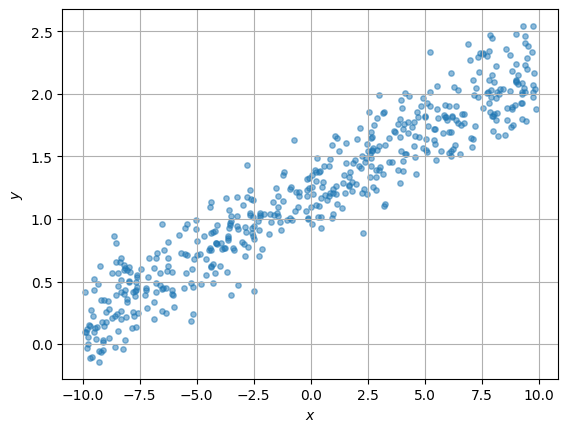

In [3]:
def plot_data(X, Y, ylabel=r'$y$', alpha=1):

    plt.scatter(X, Y, s=15, label=r'examples $(x_n, y_n)$', alpha=alpha)
    plt.xlabel(r'$x$')
    plt.ylabel(ylabel)
    plt.grid()


plot_data(x, Y, alpha=.5)

### Estimate Parameters of Linear Regression using Gradient Descent

The parameters of the linear model are estimated by gradient descent. First a function is defined which implements the mini-batch gradient descent algorithm

In [4]:
def split_array(a, size):
    return np.split(a, np.arange(size, len(a), size))


def mini_batch_gradient_descent(X, Y, theta_0, gradient, lr=0.01, mu=1e-10, max_iter=100, batch=32):

    N = X.shape[0]
    theta_min = theta_0.copy()
    n_batch = int(np.ceil(N/batch))
    n_epoch = int(np.ceil(max_iter/n_batch))
    indices = np.arange(N)

    history = list()
    history.append(theta_0.copy())

    for epoch in range(n_epoch):
        Xb = split_array(X[indices, :], batch)
        Yb = split_array(Y[indices], batch)
        np.random.shuffle(indices)

        for b in range(n_batch):
            theta_min -= lr/batch * gradient(theta_min, Xb[b], Yb[b], mu)
            history.append(theta_min.copy())

    return np.array(history)


def gradient(theta, X, Y, mu):
    return - 2*(X.T @ Y) + 2*(X.T @ X) @ theta + mu * theta


def predict(X, theta):
    return np.dot(X, theta)

Now the parameters of the linear regression are estimated

In [5]:
theta_0 = np.random.normal(size=2)
lr = 5e-3
max_iter = 500
batch = 32

history = mini_batch_gradient_descent(X, Y, theta_0, gradient, lr=lr, max_iter=max_iter, batch=batch)

print('Estimated/true intercept: {0:.3f} / {1:.3f}'.format(history[-1,0], theta[0]))
print('Estimated/true slope: {0:.3f} / {1:.3f}'.format(history[-1,1], theta[1]))

Estimated/true intercept: 1.197 / 1.200
Estimated/true slope: 0.105 / 0.100


The estimated regression line after convergence is plotted in the following. Only a slight deviation between the true and the estimated regression line can be observed.

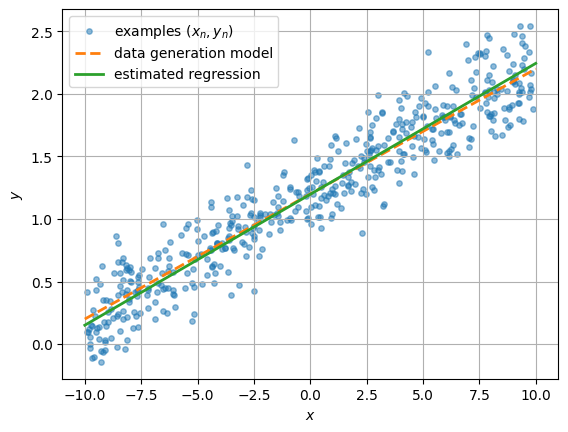

In [6]:
# plot data points
plot_data(x, Y, alpha=.5)
# plot regression lines
xl = np.linspace(-10, 10)
xl = np.concatenate((np.ones((len(xl),1)), xl[:,np.newaxis]), axis=1)

plt.plot(xl[:,1], predict(xl, theta), color='C1', linestyle='--',
         linewidth=2, label='data generation model')
plt.plot(xl[:,1], predict(xl, history[-1,:]), color='C2', linestyle='-',
         linewidth=2, label='estimated regression')
plt.legend()

### Evaluation

In order to illustrate the convergence of the gradient descent algorithm, the mean-squared error (MSE) between the predicted and the true output is plotted for the parameters estimated at a particular iteration. The convergence of the algorithm is clearly observable.

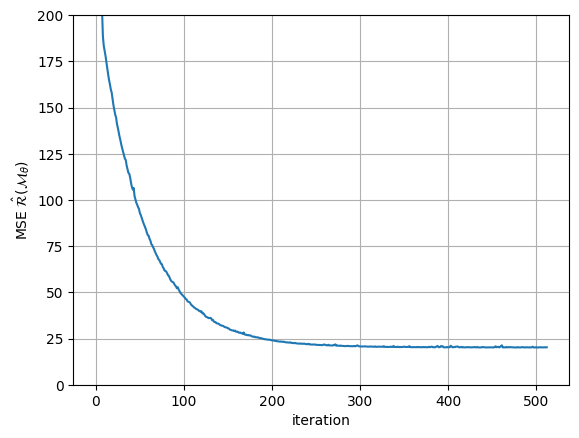

In [7]:
MSE = [np.linalg.norm(Y - predict(X,histn))**2 for histn in history]

plt.plot(MSE)
plt.xlabel('iteration')
plt.ylabel(r'MSE $\hat{\mathcal{R}}(\mathcal{M}_\theta)$')
plt.ylim([0, 200])
plt.grid()

We furthermore plot the development of the two parameters $\theta_0$ (intercept) and $\theta_1$ (slope) over the iterations. The convergence towards the true parameters is clearly observable.

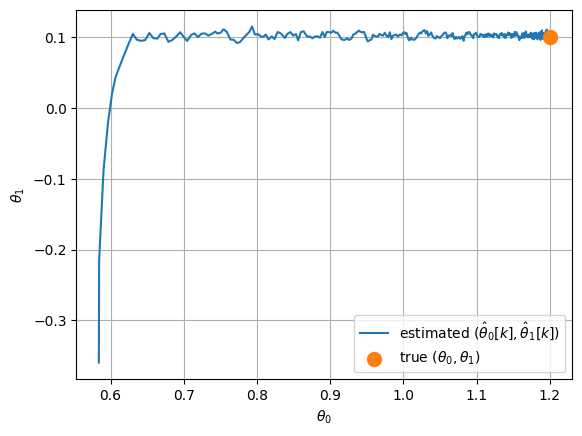

In [8]:
plt.plot(history[:,0], history[:,1], label=r'estimated $(\hat{\theta}_0[k], \hat{\theta}_1[k])$')
plt.scatter(theta[0], theta[1], alpha=1, zorder=10, s=100, color='C1', label=r'true $(\theta_0, \theta_1)$')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.grid()
plt.legend()

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.